In [1]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark PCA example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/05/21 21:16:13 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/05/21 21:16:14 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
23/05/21 21:16:14 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


In [2]:
df = spark.read.json("data/iris.json")

In [3]:
df.show(5)
df.printSchema()

+-----------+------------+-----------+------------+-----------+
|      class|petal_length|petal_width|sepal_length|sepal_width|
+-----------+------------+-----------+------------+-----------+
|Iris-setosa|         1.4|        0.2|         5.1|        3.5|
|Iris-setosa|         1.4|        0.2|         4.9|        3.0|
|Iris-setosa|         1.3|        0.2|         4.7|        3.2|
|Iris-setosa|         1.5|        0.2|         4.6|        3.1|
|Iris-setosa|         1.4|        0.2|         5.0|        3.6|
+-----------+------------+-----------+------------+-----------+
only showing top 5 rows

root
 |-- class: string (nullable = true)
 |-- petal_length: double (nullable = true)
 |-- petal_width: double (nullable = true)
 |-- sepal_length: double (nullable = true)
 |-- sepal_width: double (nullable = true)



In [4]:
df.describe().show()

+-------+--------------+------------------+------------------+------------------+-------------------+
|summary|         class|      petal_length|       petal_width|      sepal_length|        sepal_width|
+-------+--------------+------------------+------------------+------------------+-------------------+
|  count|           150|               150|               150|               150|                150|
|   mean|          null|3.7580000000000027| 1.199333333333334| 5.843333333333335|  3.057333333333334|
| stddev|          null|1.7652982332594662|0.7622376689603467|0.8280661279778637|0.43586628493669793|
|    min|   Iris-setosa|               1.0|               0.1|               4.3|                2.0|
|    max|Iris-virginica|               6.9|               2.5|               7.9|                4.4|
+-------+--------------+------------------+------------------+------------------+-------------------+



In [5]:
from pyspark.ml.feature import PCA, VectorAssembler
from pyspark.mllib.linalg import Vectors
from pyspark.ml import Pipeline
from pyspark.mllib.feature import Normalizer
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kde

In [6]:
vecAssembler = VectorAssembler(inputCols=["sepal_width", "sepal_length", "petal_width", "petal_length"], \
                               outputCol="features")

In [7]:
pca = PCA(k=2, inputCol="features", outputCol="pcaFeatures")

In [8]:
pipeline = Pipeline(stages=[vecAssembler, pca])

In [9]:
model = pipeline.fit(df)


23/05/21 21:17:29 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
23/05/21 21:17:29 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS
23/05/21 21:17:29 WARN LAPACK: Failed to load implementation from: com.github.fommil.netlib.NativeSystemLAPACK
23/05/21 21:17:29 WARN LAPACK: Failed to load implementation from: com.github.fommil.netlib.NativeRefLAPACK


In [18]:
xy = model.transform(df).select("pcaFeatures").rdd.map(lambda row: [row[0][0], row[0][1]]).collect()

In [19]:
xy

[[2.8182395066394674, -5.646349823412795],
 [2.788223445314679, -5.1499513517629145],
 [2.6133745635497077, -5.182003150742136],
 [2.7570222769675947, -5.008653597575778],
 [2.773648596054474, -5.653707089762614],
 [3.221505499764512, -6.068283025890608],
 [2.6818273818683958, -5.2374911922991245],
 [2.8762201594623713, -5.490337536526023],
 [2.615982400828451, -4.74864082264099],
 [2.8296093347880507, -5.2131783309535775],
 [2.995418041957149, -5.972021475476269],
 [2.8896099017002816, -5.341682515989069],
 [2.716255866420987, -5.091840576625977],
 [2.278561388743352, -4.815557989821312],
 [2.8576147426669745, -6.50571721326527],
 [3.116326099077871, -6.665014907228346],
 [2.878837257384578, -6.137632091008951],
 [2.8540684263546225, -5.638801721421048],
 [3.302544808991424, -6.199791615789906],
 [2.9143787327302357, -5.840512885576971],
 [3.192108917366486, -5.718298512481589],
 [2.958659903851848, -5.759948640106722],
 [2.2864257169603928, -5.460420646366219],
 [3.199631950382797, -

In [56]:
x=np.array(list(zip(*xy))[0])
y=np.array(list(zip(*xy))[1])

In [58]:
x

array([2.81823951, 2.78822345, 2.61337456, 2.75702228, 2.7736486 ,
       3.2215055 , 2.68182738, 2.87622016, 2.6159824 , 2.82960933,
       2.99541804, 2.8896099 , 2.71625587, 2.27856139, 2.85761474,
       3.1163261 , 2.87883726, 2.85406843, 3.30254481, 2.91437873,
       3.19210892, 2.9586599 , 2.28642572, 3.19963195, 3.14661108,
       2.99569623, 3.03354506, 2.94004523, 2.86283042, 2.87037575,
       2.91496666, 3.09243264, 2.8535028 , 2.90362838, 2.86543825,
       2.63612348, 2.87712708, 2.70168102, 2.52186309, 2.91235882,
       2.73226271, 2.65299643, 2.50495859, 3.09675065, 3.29287589,
       2.78791371, 2.96421687, 2.66290296, 2.95927938, 2.79900535,
       6.78719082, 6.43485366, 6.96666745, 5.68568285, 6.59046839,
       6.14403422, 6.5974258 , 4.75324246, 6.54649696, 5.49361973,
       4.99452425, 6.01406369, 5.76734164, 6.48729964, 5.32843976,
       6.43022591, 6.16264889, 5.73847013, 6.44709886, 5.54759211,
       6.61864831, 5.86025355, 6.80054901, 6.42409406, 6.21721

In [59]:
y

array([-5.64634982, -5.14995135, -5.18200315, -5.0086536 , -5.65370709,
       -6.06828303, -5.23749119, -5.49033754, -4.74864082, -5.21317833,
       -5.97202148, -5.34168252, -5.09184058, -4.81555799, -6.50571721,
       -6.66501491, -6.13763209, -5.63880172, -6.19979162, -5.84051289,
       -5.71829851, -5.75994864, -5.46042065, -5.42566143, -5.28967072,
       -5.1809357 , -5.45790407, -5.69467143, -5.63899256, -5.12999135,
       -5.12263409, -5.73787684, -6.1403164 , -6.42009834, -5.20563023,
       -5.39631705, -5.9263226 , -5.59559631, -4.83899423, -5.55599641,
       -5.59048011, -4.385992  , -4.98502652, -5.51582401, -5.76361572,
       -5.07674437, -5.83072372, -5.09900701, -5.9063626 , -5.43465866,
       -6.01211305, -5.64528622, -5.83121539, -4.49899357, -5.40154325,
       -4.90870571, -5.61042085, -4.32206162, -5.55531448, -4.60387067,
       -4.06098139, -5.22297134, -4.77691611, -5.20213472, -5.07209837,
       -5.79413207, -4.97398291, -4.99334181, -4.78380703, -4.74

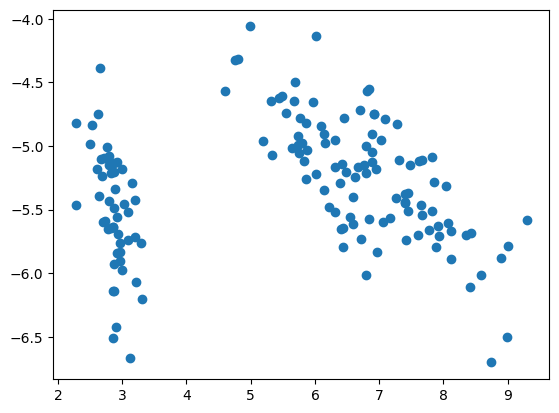

In [60]:
plt.scatter(x,y)
plt.show()

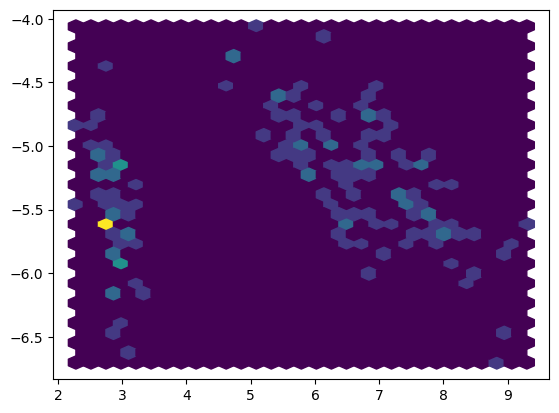

In [61]:
plt.hexbin(x,y,  gridsize=30)
plt.show()


/var/folders/4q/synq9nts6dz2rwxkqkt0q8fc0000gn/T/ipykernel_1234/2060919539.py:3: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  k = kde.gaussian_kde(np.transpose(xy))


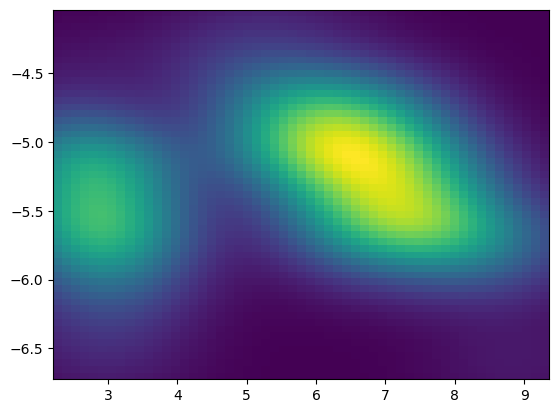

In [62]:
nbins = 55

k = kde.gaussian_kde(np.transpose(xy))
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
plt.pcolormesh(xi, yi, zi.reshape(xi.shape))
plt.show()